In [1]:
from src.simulation_module_GCE import run_simulation, plot_hist, weight, read_eta, save_eta
from src.simulation_module import plot_val_over_NMC
import src.algorithm as algo
import pantarei as rei
import numpy as np
import matplotlib.pyplot as plt

Single simulation without parallelization

In [2]:
# my_algo = algo.Algorithm()
# sim = my_algo.simulation_GC

# which_vals = {'energy': True, 'pressure': False, 'density': True, 'N': True}

# steps = 1
# volume = 8.735**3
# T = 1.175
# z = 0.0625
# # z = 0.0635

# # eta = calc_eta(Ns)

# eta = []
# temp_eta_file = 'save_past/eta_save_inv.txt'
# with open(temp_eta_file,'r') as f:
#     for line in f:
#         val = line.split()[1]
#         eta.append(float(val))
# eta = np.array(eta)
# print(eta[108]/eta[109])
# # Es,Ps,ds,Ns = [],[],[],[]

# clear_first=False
# clear_first=True
# wait=None
# if wait is None: wait=clear_first

# data = run_simulation(function=sim,which_vals=which_vals,temperature=T,volume=volume,z=z,eta=eta,steps=steps,clear_first=clear_first,parallel=False,wait=wait)

Pallel simulations over multiple seeds to speed up the data acquisition.  
Note 3 different points below the critical point:  
- `T = 1.175`, `z = 0.0625`
- `T = 1.165`, `z = 0.0605`
- `T = 1.155`, `z = 0.05878`

Different tries were done to find the points and to have enogh data to build a histogram needed to compute $\eta(N)$  
(When using parallel, the first time using the parameters, remove the comment in the line with `clear_first=True`. Then to use the results comment again the line)

0.2621970414818988 2.8896936962824922e-05
0.11182859947327206 3.030276446914945e-05
0.1901517486236469 3.0373794835724116e-05
0.12846844138438324 3.061455642215809e-05


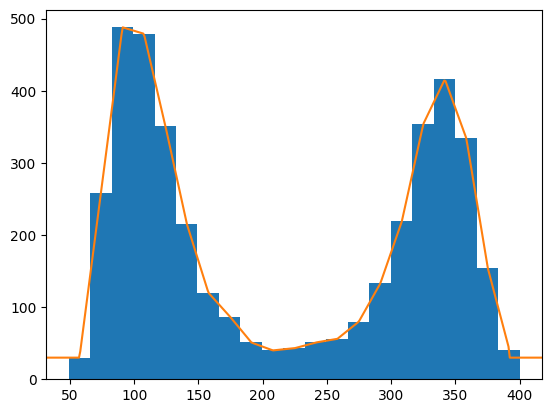

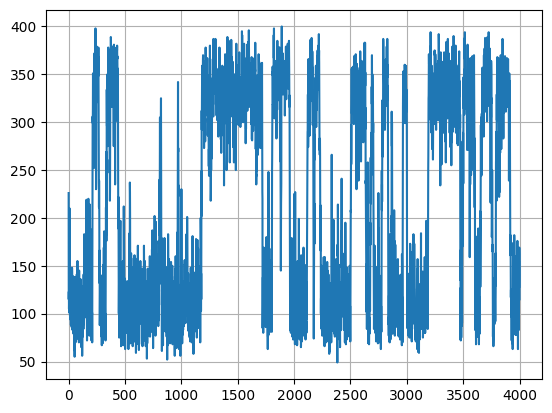

In [ ]:
my_algo = algo.Algorithm()
sim = my_algo.simulation_GC

# Ts = [10,11,12,113]
# for T in Ts:
    # my_algo.run_simulation(temperature=T,volume=10,z=10,steps=200,clear_first=False,parallel=True,wait=True)

which_vals = {'energy': True, 'pressure': False, 'density': True, 'N': True}

steps = 2.5e5
volume = 8.735**3
T = 1.175
z = 0.0625
bins_divider = 20

# steps = 2.5e4
# T = 1.165
# z = 0.0605

steps = 2.5e4
steps = 5e4
steps = 1e5
# steps = 2.5e5
T = 1.155
# z = 0.059
# z = 0.0588
# z = 0.05875
z = 0.05878
bins_divider = 16

Es,Ps,ds,Ns = [],[],[],[]
Ns_start = []

clear_first=False
# clear_first=True
wait=None
if wait is None: wait=clear_first
for s in [0,1,2,3]:
    data = run_simulation(function=sim,which_vals=which_vals,temperature=T,volume=volume,z=z,steps=steps,seed=s,
                        clear_first=clear_first,parallel=True,wait=wait)
    if not wait:
        print(data['acceptance']['accept_ratio'],data['tot_time'])
        if which_vals['energy']:    Es += data['energy']
        if which_vals['pressure']:  Ps += data['pressure']
        if which_vals['density']:   ds += data['density']
        if which_vals['N']:         Ns_start += data['N']

if not wait:
    save_eta(Ns_start,temp_eta_file=f'eta_T{T}_z{z}.txt',bins_divider=bins_divider)
    plot_val_over_NMC(Ns_start)

Let's take now a look at the histogram and the corresponding probability fit used to compute $\eta(N)$ as $\eta(N) = \log(p(N))$.  
We try to find a good number of bins (computed as `int((max(val)-min(val))/bins_divider`) such as there are no holes in the distribution, this way we can avoid having unwanted probability barriers that would highly effect the statistics of the biased montecarlo.

Text(0.5, 1.0, 'probability distribution of N for:\nT = 1.155,  z = 0.059')

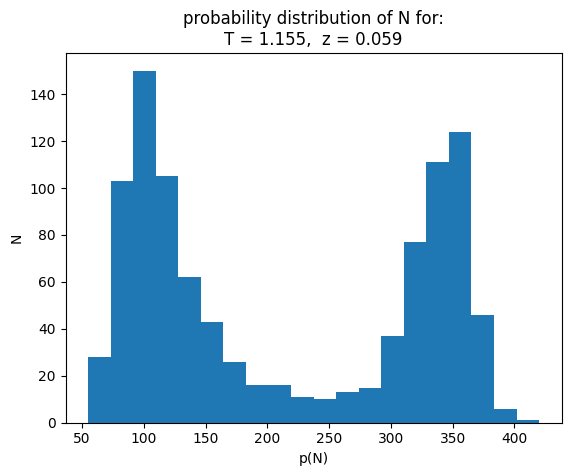

In [ ]:
val = Ns_start
bins = int((max(Ns_start)-min(Ns_start))/18)
p = plt.hist(val,bins)
plt.xlabel('p(N)')
plt.ylabel('N')
plt.title(f'probability distribution of N for:\nT = {T},  z = {z}')


# save_eta(Ns_start,temp_eta_file=f'eta_T{T}_z{z}.txt',bins_divider=18)

In [ ]:
### this is similar to the body of the function 'save_eta()' ###

# val = Ns_start
# bins = int((max(Ns_start)-min(Ns_start))/20)
# p = plt.hist(val,bins)


# p_x = p[1].copy()
# p_y = p[0].copy()



# for k in range(len(p_x)-1):
#     p_x[k] += (p_x[k+1]-p_x[k])/2


# prob = np.zeros(1000)
# for n in range(1000):

#     for k in range(len(p_y)-1):
#         m = (p_y[k+1]-p_y[k])/(p_x[k+1]-p_x[k])
        
#         if n >= p_x[k] and n < p_x[k+1]:
#             prob[n] = (n-p_x[k])*m + p_y[k]

#     if prob[n] < min(p_y):
#         prob[n] = min(p_y)


# x = np.linspace(0,1000,1000)
# plt.plot(x,prob,'-')
# # plt.ylim([0,15000])

# prob /= prob.sum()


In [ ]:
#### save some data if needed ####

# # p = np.zeros(1000)
# # for val in Ns:
# #     p[int(val)] += 1
# # p += 1e-10
# # p /= p.sum()

# # temp_p_file = 'save_past/p_save.txt'
# # with open(temp_p_file,'w') as f:
# #     for k in range(p.shape[0]):
# #         f.write(f'{k:6}   {p[k]}\n')

# temp_p_file = 'save_past/prob_save.txt'
# with open(temp_p_file,'w') as f:
#     for k in range(prob.shape[0]):
#         f.write(f'{k:6}   {prob[k]}\n')

# eta = np.log(prob)

# temp_eta_file = 'save_past/eta_save.txt'
# with open(temp_eta_file,'w') as f:
#     for k in range(eta.shape[0]):
#         f.write(f'{k:6}   {eta[k]}\n')


# # weight = np.exp(-1./p)

# # temp_weight_file = 'save_past/
# # with open(temp_weight_file,'w') as f:
# #     for k in range(weight.shape[0]):
# #         f.write(f'{k:6}   {weight[k]}\n')

Let's now do a simulation with biased Montecarlo  
(When using parallel, the first time using the parameters, remove the comment in the line with `clear_first=True`. Then to use the results comment again the line)

0.13525361601978375 4.660097963892769e-05
0.10728487469894123 4.4139772727559333e-05
0.16197411775568282 4.258895637294943e-05
0.1628547419678904 4.6167971232928765e-05


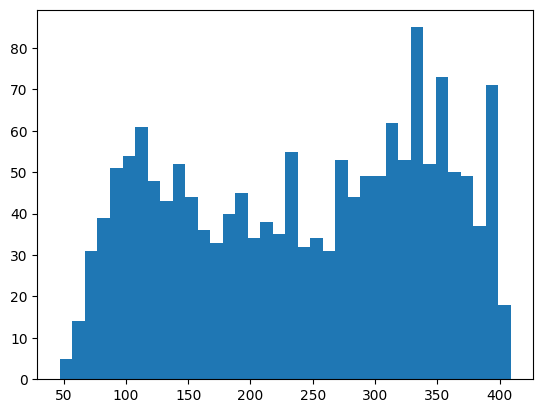

In [ ]:
steps = 2.5e4
# steps = 1e4
steps = 4e4
# steps = 8e4
# steps = 16e4
volume = 8.735**3
T = 1.175
z = 0.0625
# z = 0.0635


# eta_namefile = f'eta_T{T}_z{z}.txt'
eta = read_eta()

Es,Ps,ds,Ns = [],[],[],[]

clear_first=False
# clear_first=True                                ###### TOGGLE ######
wait=None
if wait is None: wait=clear_first

for s in [0,1,2,3]:
    data = run_simulation(function=sim,which_vals=which_vals,temperature=T,volume=volume,z=z,eta=eta,steps=steps,seed=s,clear_first=clear_first,parallel=True,wait=wait)

    if not wait:
        print(data['acceptance']['accept_ratio'],data['tot_time'])
        if which_vals['energy']:    Es += data['energy']
        if which_vals['pressure']:  Ps += data['pressure']
        if which_vals['density']:   ds += data['density']
        if which_vals['N']:         Ns += data['N']



if not wait:
    val = Ns
    bins = int((max(Ns)-min(Ns))/10)
    plt.hist(val,bins)


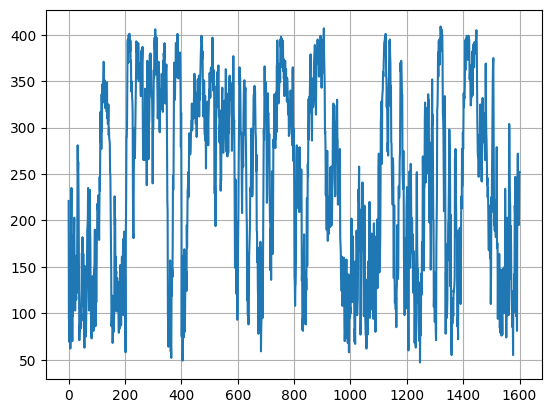

In [18]:
from src.simulation_module import plot_val_over_NMC
plot_val_over_NMC(Ns)

Let's remove the bias now:

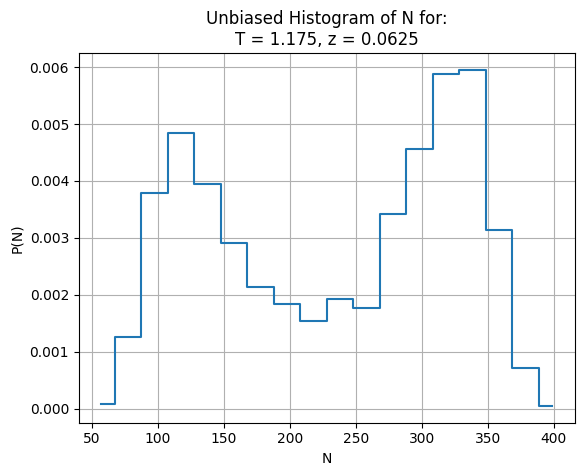

In [36]:
Ns = np.array(Ns)

num_bins = int((Ns.max()-Ns.min())/20)
# plt.hist(Ns_start,num_bins,density=True)


weights = weight(eta=eta,beta_0=1./T)

bin_edges = np.linspace(Ns.min(), Ns.max(), num_bins + 1)

H_unbiased = np.zeros(num_bins)

bin_indices = np.digitize(Ns, bin_edges) - 1  # Subtract 1 to index from 0

for i in range(len(Ns)):
    bin_idx = bin_indices[i]
    if 0 <= bin_idx < num_bins:
        H_unbiased[bin_idx] += weights[Ns[i]]

H_unbiased /= np.sum(H_unbiased) * np.diff(bin_edges)

bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# plt.figure(figsize=(8, 5))
plt.plot(bin_centers, H_unbiased, drawstyle='steps-mid')
# plt.plot(bin_centers, H_unbiased, drawstyle='steps-mid',fillstyle='bottom')
plt.xlabel('N')
plt.ylabel('P(N)')
plt.title(f'Unbiased Histogram of N for:\nT = {T}, z = {z}')
plt.grid()
# plt.tight_layout()
plt.show()


Let's do it now for a lower temperature and a higher number of steps

0.16731931671692155 3.0918086151775856e-05
0.17278988902666387 3.1113324079114095e-05
0.1744640662947714 3.119868498250959e-05
0.17743281535057642 3.1034925025856194e-05


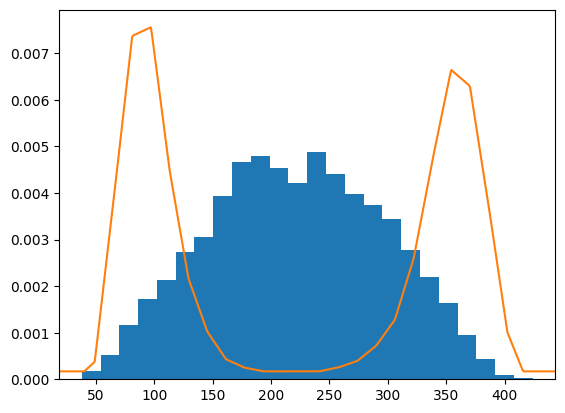

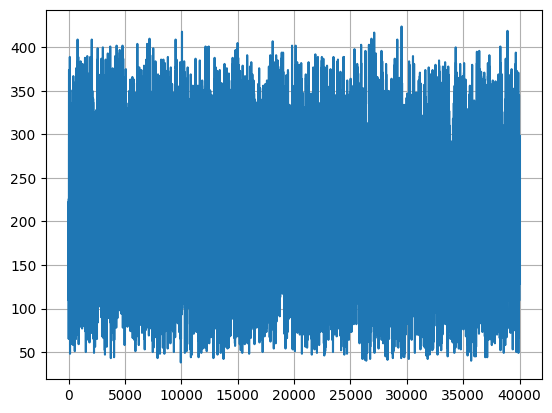

In [31]:
volume = 8.735**3
steps = 2.5e4
# steps = 5e4
# steps = 1e5
# steps = 2.5e5
steps = 1e6
# steps = 5e5
T = 1.155
z = 0.05878
bins_divider = 16


eta_namefile = f'eta_T{T}_z{z}.txt'
eta_namefile = f'eta_T{T}_z{z}_long.txt'
eta = read_eta(eta_namefile)

Es,Ps,ds,Ns = [],[],[],[]

clear_first=False
# clear_first=True                                ###### TOGGLE ######
wait=None
if wait is None: wait=clear_first

for s in [0,1,2,3]:
    data = run_simulation(function=sim,which_vals=which_vals,temperature=T,volume=volume,z=z,eta=eta,steps=steps,seed=s,clear_first=clear_first,parallel=True,wait=wait)

    if not wait:
        print(data['acceptance']['accept_ratio'],data['tot_time'])
        if which_vals['energy']:    Es += data['energy']
        if which_vals['pressure']:  Ps += data['pressure']
        if which_vals['density']:   ds += data['density']
        if which_vals['N']:         Ns += data['N']



if not wait:
    val = Ns.copy()
    bins = int((max(Ns)-min(Ns))/bins_divider)
    plt.hist(val,bins,density=True)

    x = np.linspace(0,1000,1000)
    plt.plot(x,np.exp(eta))
    dx = (max(Ns) - min(Ns))/20
    plt.xlim([min(Ns)-dx,max(Ns)+dx])

    plot_val_over_NMC(Ns)



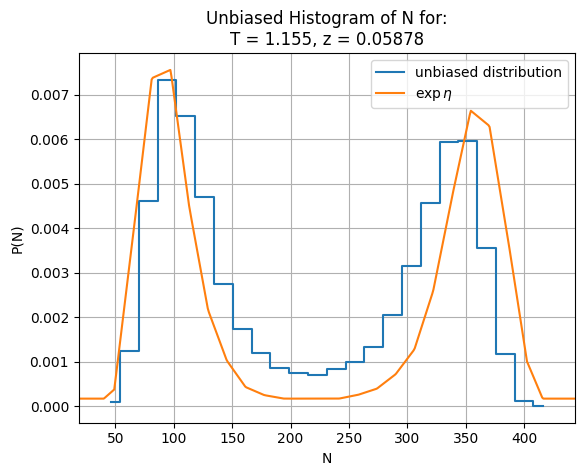

In [40]:
Ns = np.array(Ns)

num_bins = int((Ns.max()-Ns.min())/16)
# plt.hist(Ns_start,num_bins,density=True)


weights = weight(eta=eta,beta_0=1./T)

bin_edges = np.linspace(Ns.min(), Ns.max(), num_bins + 1)

H_unbiased = np.zeros(num_bins)

bin_indices = np.digitize(Ns, bin_edges) - 1  # Subtract 1 to index from 0

for i in range(len(Ns)):
    bin_idx = bin_indices[i]
    if 0 <= bin_idx < num_bins:
        H_unbiased[bin_idx] += weights[Ns[i]]

H_unbiased /= np.sum(H_unbiased) * np.diff(bin_edges)
# H_unbiased /= np.sum(H_unbiased)

bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# plt.figure(figsize=(8, 5))
plt.plot(bin_centers, H_unbiased, drawstyle='steps-mid',label='unbiased distribution')
# plt.plot(bin_centers, H_unbiased, drawstyle='steps-mid',fillstyle='bottom')
plt.xlabel('N')
plt.ylabel('P(N)')
plt.title(f'Unbiased Histogram of N for:\nT = {T}, z = {z}')
plt.grid()
# plt.tight_layout()


x = np.linspace(0,1000,1000)
plt.plot(x,np.exp(eta),label=f'$\exp\eta$')
dx = (max(Ns) - min(Ns))/20
plt.xlim([min(Ns)-dx,max(Ns)+dx])

plt.legend()
plt.show()


In [ ]:
### before using the distribution (for the previous run), fix it to not have a too high ###
### barrier around the extremes of the distribution ###

# plt.plot(bin_centers, H_unbiased, drawstyle='steps-mid')


# p_x = bin_edges.copy()
# p_y = H_unbiased.copy()
# for k in range(len(p_x)-1):
#     p_x[k] += (p_x[k+1]-p_x[k])/2


# prob = np.zeros(1000)
# for n in range(1000):
#     for k in range(len(p_y)-1):
#         m = (p_y[k+1]-p_y[k])/(p_x[k+1]-p_x[k])
#         if n >= p_x[k] and n < p_x[k+1]:
#             prob[n] = (n-p_x[k])*m + p_y[k]
#     if prob[n] < p_y[12]:
#         prob[n] = p_y[12]


# x = np.linspace(0,1000,1000)
# plt.plot(x,prob,'-')
# dx = (max(val) - min(val))/20
# plt.xlim([min(val) - dx, max(val) + dx])

# prob /= prob.sum()
# eta = np.log(prob)

# temp_eta_file = f'eta_T{T}_z{z}_long.txt'
# with open(temp_eta_file,'w') as f:
#     for k in range(eta.shape[0]):
#         f.write(f'{k:6}   {eta[k]}\n')

# # plt.hlines(p_y[12],0,1000)